Задание к 13 апреля - взять выборку load_digits из sklearn. Сделать PCA и tSNE преобразования до 2 компонент, визуализировать и сделать выводы. 

Для PCA изучить график уменьшения дисперсии и предоположить есть ли в этой задаче эффективная размерность

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import to_rgb
from sklearn.datasets import load_digits

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
dataset = load_digits()

In [3]:
X = dataset['data']
y = dataset['target']

# Visualization

In [4]:
def plot(X, y):
    colors = [
        'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
        'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
    ]
    x0_min, x0_max = X[:,0].min(), X[:,0].max()
    x1_min, x1_max = X[:,1].min(), X[:,1].max()
    plt.figure(figsize=(15, 15))
    plt.xlim(x0_min - 0.1 * (x0_max - x0_min), x0_max + 0.1 * (x0_max - x0_min))
    plt.ylim(x1_min - 0.1 * (x1_max - x1_min), x1_max + 0.1 * (x1_max - x1_min))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    for point, label in zip(X, y):
        plt.annotate(label, point, c=colors[label])
    plt.show()

In [5]:
def plot_images(X, y, images):
    colors = [
        'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
        'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
    ]
    
    x0_min, x0_max = X[:,0].min(), X[:,0].max()
    x1_min, x1_max = X[:,1].min(), X[:,1].max()
    plt.figure(figsize=(15, 15))
    plt.xlim(x0_min - 0.1 * (x0_max - x0_min), x0_max + 0.1 * (x0_max - x0_min))
    plt.ylim(x1_min - 0.1 * (x1_max - x1_min), x1_max + 0.1 * (x1_max - x1_min))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    for x, label, image in zip(X, y, images):
        plt.imshow(
            np.stack(
                [np.ones((8, 8)) * to_rgb(colors[label])[i] for i in range(3)] + [image / image.max()],
                axis=-1,
            ),
            cmap='binary',
            aspect='auto',
            extent=(
                x[0] - 0.005 * (x0_max - x0_min),
                x[0] + 0.005 * (x0_max - x0_min),
                x[1] - 0.005 * (x1_max - x1_min),
                x[1] + 0.005 * (x1_max - x1_min),
            ),
            alpha=0.9,
        )
    plt.show()

## PCA

In [6]:
model = PCA(n_components=2, random_state=42)
X_reduced = model.fit_transform(X)

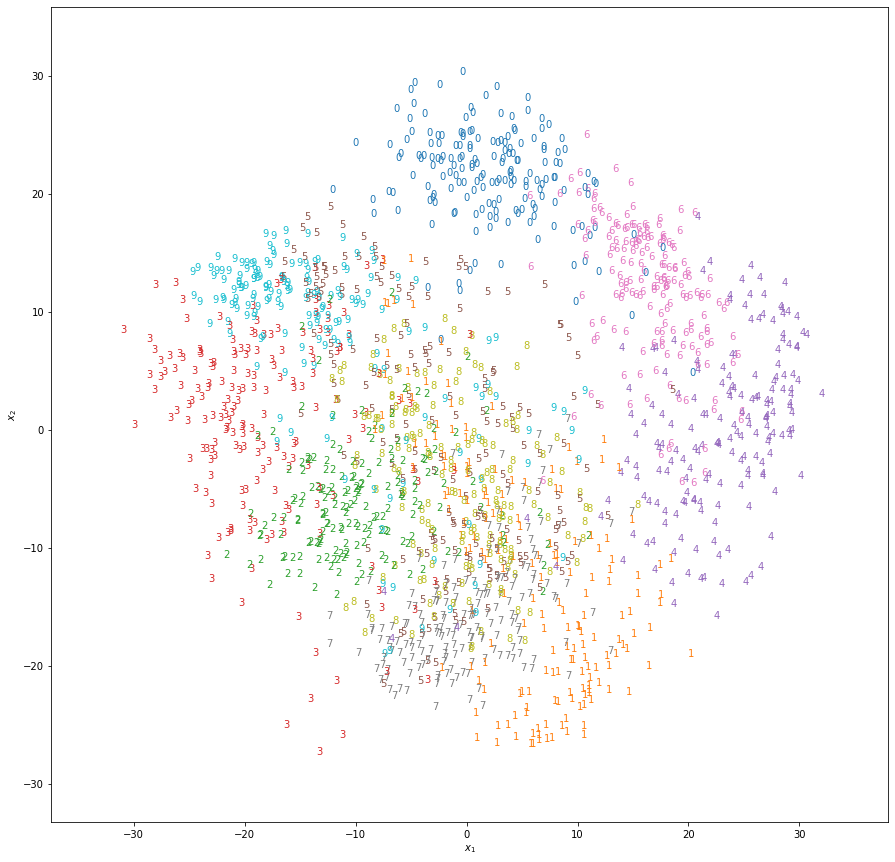

In [7]:
plot(X_reduced, y)

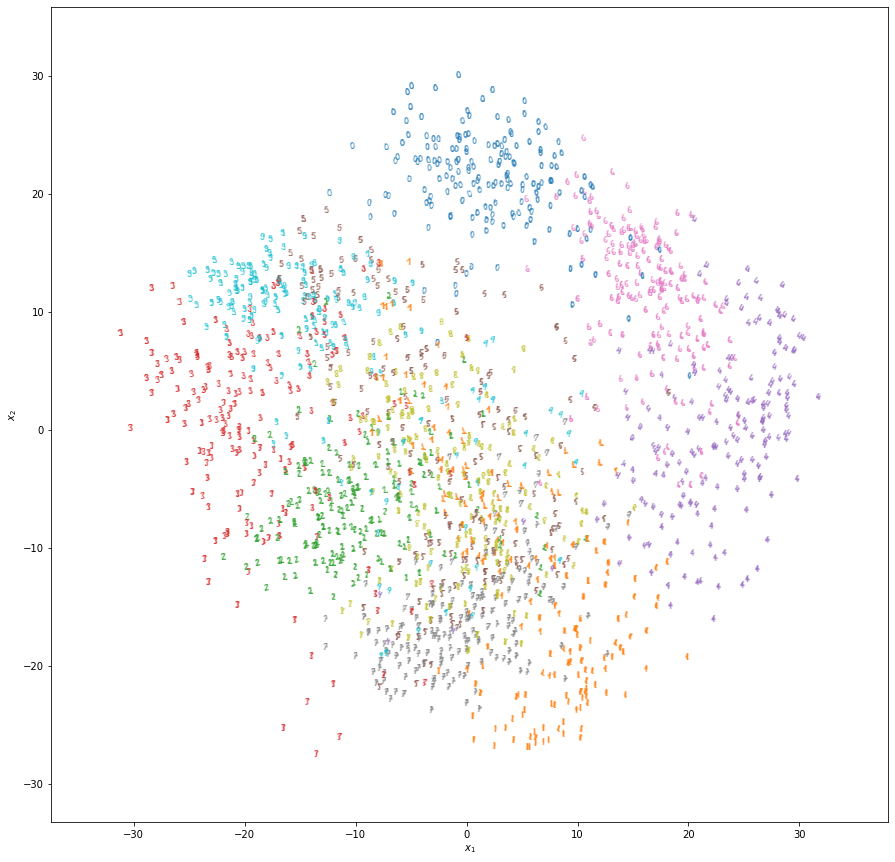

In [8]:
plot_images(X_reduced, y, dataset['images'])

Видно, что часть классов с трудом разделима, однако видны зоны, в которых лежат элементы преимущественно одного класса. Возможно, нужно большее число компонент.

## TSNE

In [9]:
model = TSNE(n_components=2, n_jobs=4, random_state=42)
X_reduced = model.fit_transform(X)

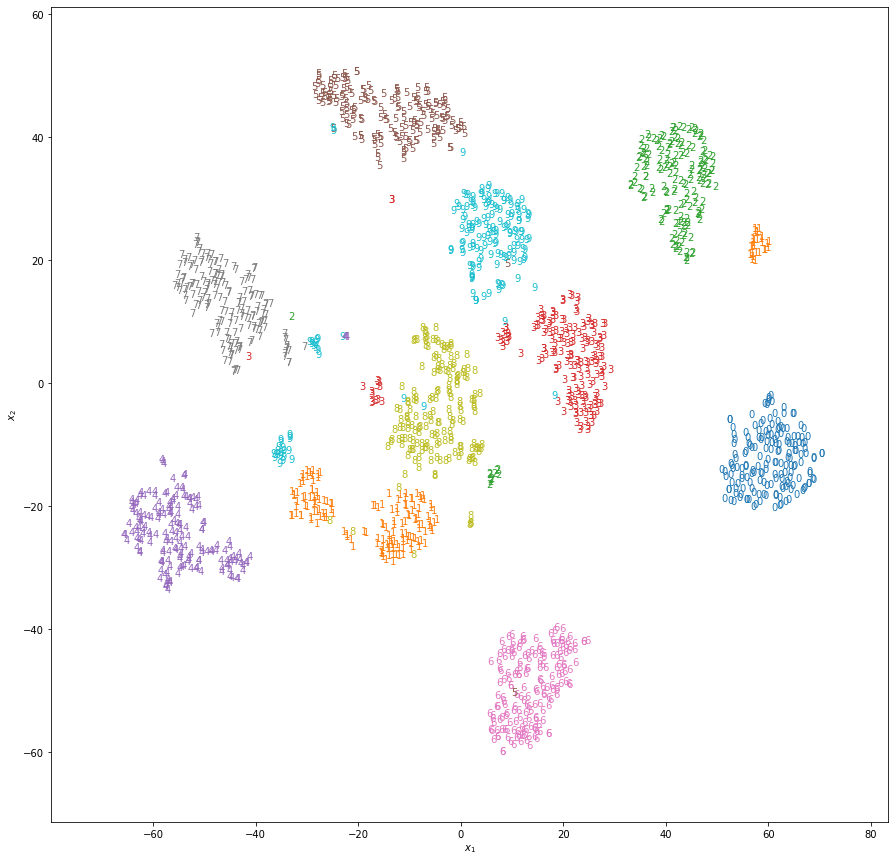

In [10]:
plot(X_reduced, y)

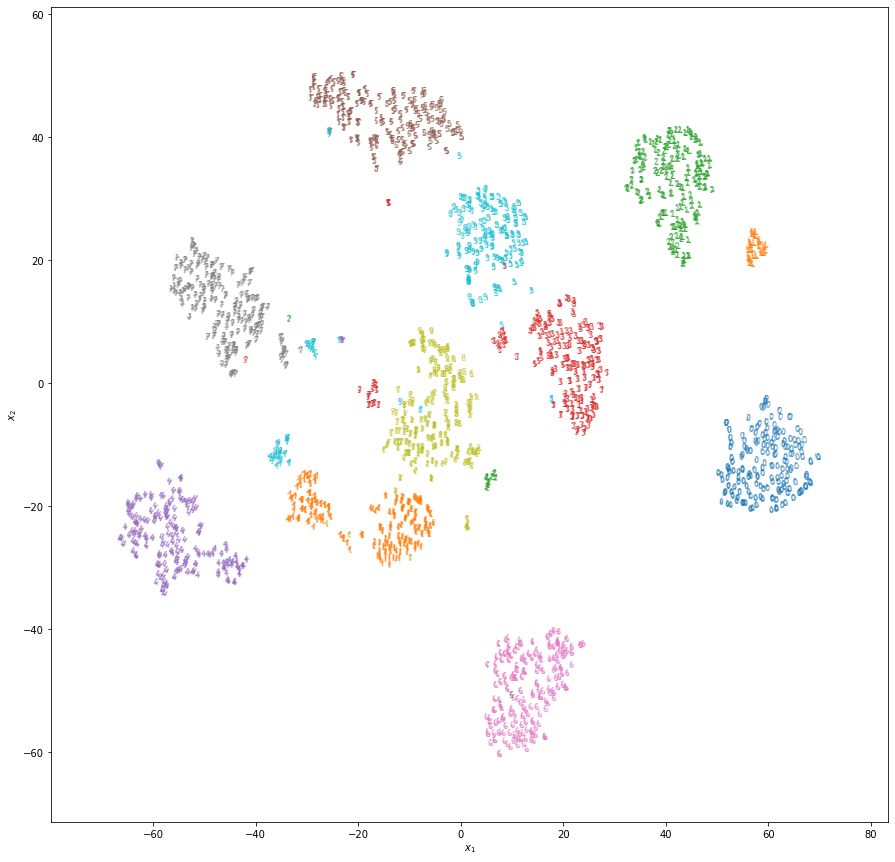

In [11]:
plot_images(X_reduced, y, dataset['images'])

Видно, что TSNE успешно делает классы разделимыми и проблемы есть только у единиц, девяток и двоек - единицы разделяются визуально на 3 кластера: единицы с подчёркиванием, без подчеркивания и "палочки", девятки - на три в зависимости от вида нижнего хвоста, а часть более скошенных двоек лежит около восьмёрок. Кроме того, несколько девяток отнесены ближе к тройкам и восьмёркам и ещё несколько сэмплов лежат в других кластерах.

# Optimal PCA dimension

Построим график долей дисперсии, объясняемых первыми n компонентами. Найдём количество компонент, достаточное для объяснения 80%, 95% и 99% дисперсии.

13 components explain 80.29% of variance
29 components explain 95.48% of variance
41 components explain 99.01% of variance


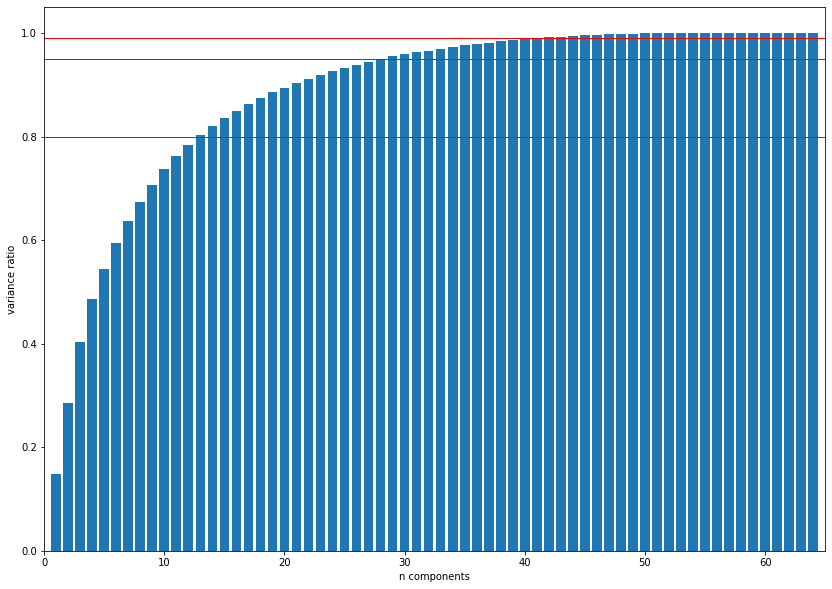

In [12]:
plt.figure(figsize=(14, 10))
plt.xlabel('n components')
plt.ylabel('variance ratio')
plt.xlim(0, 65)
variance_ratios = PCA(n_components=64, random_state=42).fit(X).explained_variance_ratio_.cumsum()
plt.bar(range(1, 65), variance_ratios)
for ratio in [0.8, 0.95, 0.99]:
    plt.plot([0, 65], [ratio, ratio], c='r', lw=1)
    for n in range(1, 65):
        if variance_ratios[n - 1] > ratio:
            print(f'{n} components explain {round(100 * variance_ratios[n - 1], 2)}% of variance')
            break